### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
# Import the data set.
df_review = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df_review


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
df_review.isnull().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
df_review.shape

(2000, 11)

In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
df_review.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
df_revised = df_review.drop(['language','platform'], axis=1)

In [8]:
# View column names.
list(df_revised.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [9]:
# Rename the column headers.
df_revised.rename(columns={'remuneration (k£)':'renumeration','spending_score (1-100)':'spend_score'}, inplace=True)

# View column names.
list(df_revised.columns)

['gender',
 'age',
 'renumeration',
 'spend_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
df_revised.to_csv('df_revised_new.csv')

In [11]:
# Import new CSV file with Pandas.
df_revised_new = pd.read_csv('df_revised_new.csv')

# View DataFrame.
df_revised_new

,Unnamed: 0,gender,age,renumeration,spend_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [12]:
# Explore the data.
df_revised_new.shape

(2000, 10)

In [13]:
df_revised_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spend_score     2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [14]:
df_revised_new.describe()

,Unnamed: 0,age,renumeration,spend_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,577.494589,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,0.000000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        14:59:05   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

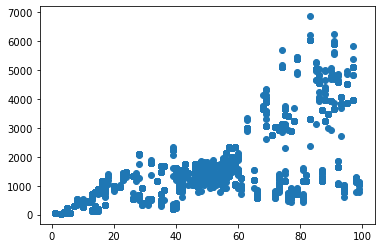

In [15]:
# Install the necessary modules.
!pip install scipy
import statsmodels.api as sm 
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Independent variable.
x = df_revised_new['spend_score'].values.reshape(-1, 1)


# Dependent variable.
y = df_revised_new['loyalty_points'].values.reshape(-1, 1)

# Check for linearity.
plt.scatter(x,y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df_revised_new).fit()

test.summary()

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the x coefficient to 33.061693 and the constant to -75.052663 to generate the regression table.
y_pred = 33.061693 * df_revised_new['spend_score'] - 75.052663
#View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spend_score, Length: 2000, dtype: float64

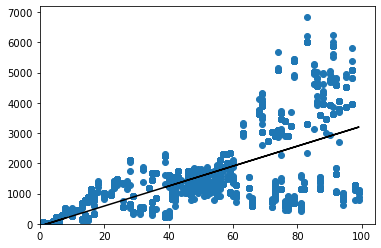

In [35]:
# Plot the graph with a regression line.
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()


### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        15:11:38   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

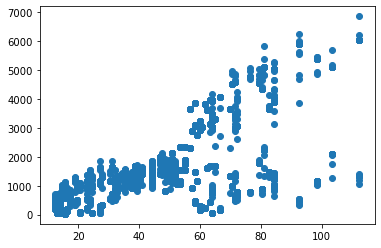

In [36]:
# Independent variable.
x = df_revised_new['renumeration'].values.reshape(-1, 1)


# Dependent variable.
y = df_revised_new['loyalty_points'].values.reshape(-1, 1)

# Check for linearity.
plt.scatter(x,y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df_revised_new).fit()

test.summary()


In [37]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [38]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the x coefficient to 34.187825 and the constant to -65.686513 to generate the regression table.
y_pred = 34.187825 * df_revised_new['renumeration'] - 65.686513
#View the output
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

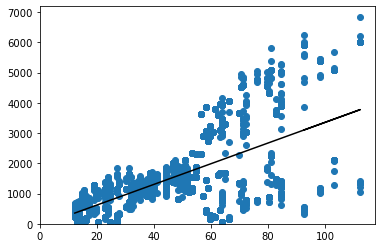

In [39]:
# Plot the graph with a regression line.
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

In [45]:
# Import new CSV file with Pandas.
df_revised_new = pd.read_csv('df_revised_new.csv')

# View DataFrame.
df_revised_new

,Unnamed: 0,gender,age,renumeration,spend_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 13 Sep 2022   Prob (F-statistic):             0.0577
Time:                        15:13:22   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

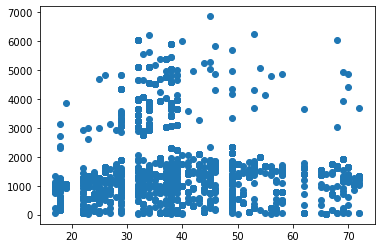

In [47]:
# Independent variable.
x = df_revised_new['age'].values.reshape(-1, 1)

# Dependent variable.
y = df_revised_new['loyalty_points'].values.reshape(-1, 1)

# Check for linearity.
plt.scatter(x,y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df_revised_new).fit()

test.summary()


In [41]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values
print("Predicted values: ", test.predict())


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [42]:
# Set the X coefficient and the constant to generate the regression table.
# Set the the x coefficient to 1736.517739 and the constant to -4.012805 to generate the regression table.
y_pred =  -4.012805 * df_revised_new['age'] + 1736.517739
#View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

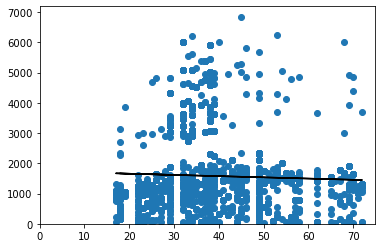

In [43]:
# Plot graph with regression line.
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

## 6. Observations and insights

***Your observations here...***






In [44]:
#Age is not a variable that explains outputs if the observed variation in loyalty points
#Spending score & renumeration indicates between 38% and 45% respectively of the observed variation can be explained by the model's inputs


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [58]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [59]:
# View DataFrame.
df_revised_new

,Unnamed: 0,gender,age,renumeration,spend_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [60]:
# Drop unnecessary columns.
df_cluster = df_revised_new.drop(columns=['gender','education','review','age','product','summary','loyalty_points'], axis=1)

# View column names.
list(df_revised_new.columns)

# View DataFrame.
df_cluster

,Unnamed: 0,renumeration,spend_score
0,0,12.30,39
1,1,12.30,81
2,2,13.12,6
3,3,13.12,77
4,4,13.94,40
...,...,...,...
1995,1995,84.46,69
1996,1996,92.66,8
1997,1997,92.66,91
1998,1998,98.40,16


In [61]:
# Explore the data.
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2000 non-null   int64  
 1   renumeration  2000 non-null   float64
 2   spend_score   2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [62]:
df_cluster.to_csv('df_cluster_v2.csv', index=False)

# Import new CSV file with Pandas.
df_cluster_new = pd.read_csv('df_cluster_v2.csv', index_col=[0])

# View DataFrame.
(df_cluster_new)

,renumeration,spend_score
Unnamed: 0,,
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91


In [63]:
df_cluster_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renumeration  2000 non-null   float64
 1   spend_score   2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spend_score'>

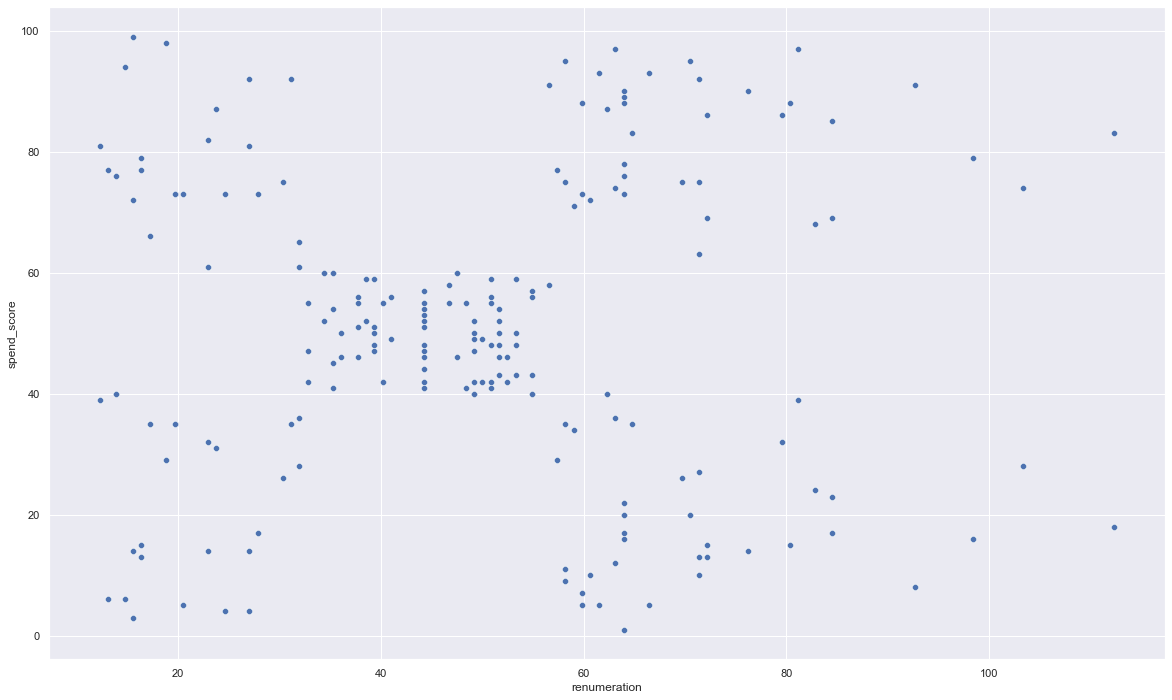

In [64]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration', y='spend_score',
                data=df_cluster_new)


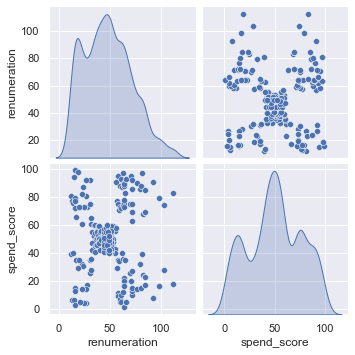

In [65]:
import seaborn as sns

# Create a pairplot with Seaborn.
x = df_cluster_new[['renumeration', 'spend_score']]

sns.pairplot(df_cluster_new, diag_kind= 'kde')

## 3. Elbow and silhoutte methods

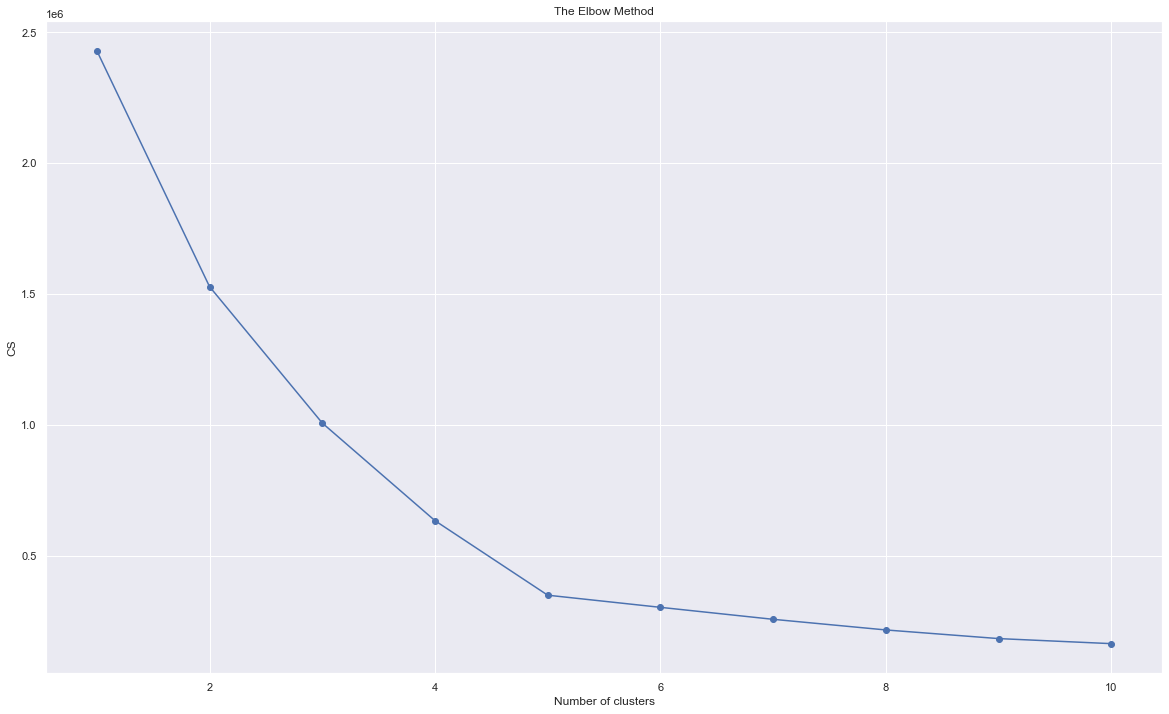

In [66]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cluster_new)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()


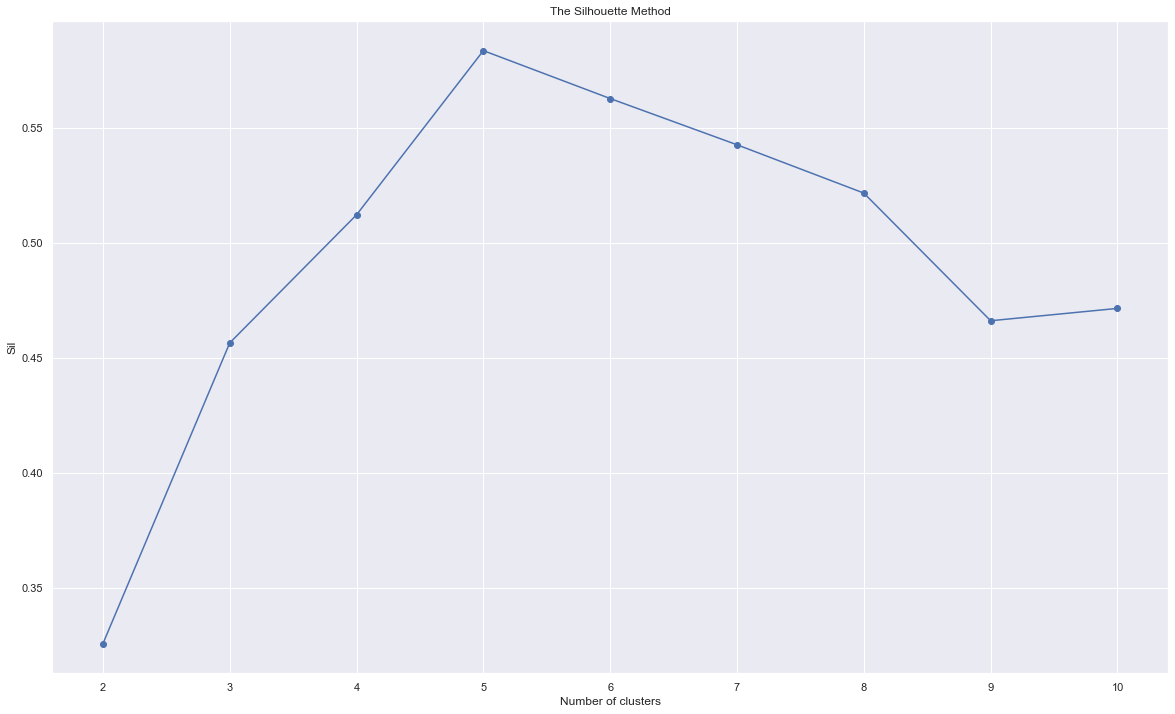

In [67]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df_cluster_new)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df_cluster_new, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

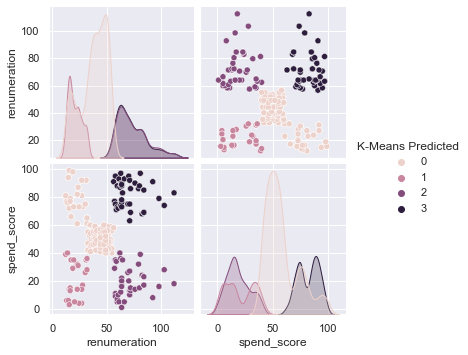

In [189]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(df_cluster_new)
clusters = kmeans.labels_
df_cluster_new['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df_cluster_new, hue='K-Means Predicted', diag_kind= 'kde')

In [190]:
# Check the number of observations per predicted class.
df_cluster_new['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

<AxesSubplot:xlabel='renumeration', ylabel='spend_score'>

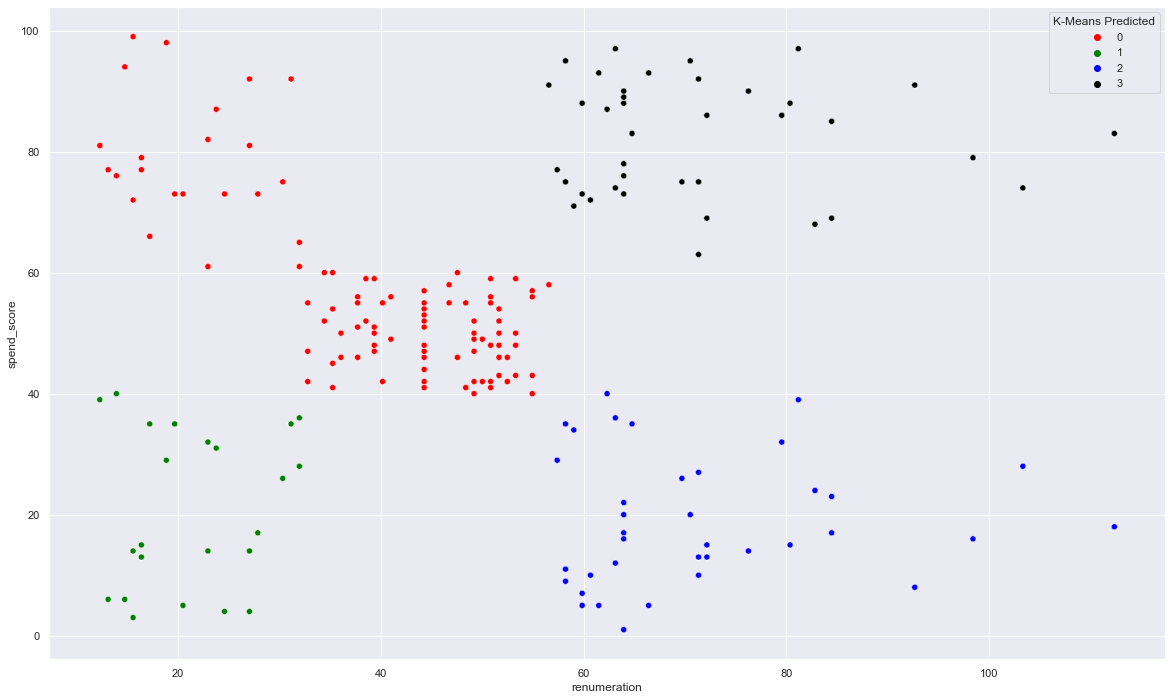

In [191]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(20, 12)})

sns.scatterplot(x='renumeration', 
                y ='spend_score',
                data=df_cluster_new.reset_index() , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

In [192]:
# View the K-Means predicted.
print(df_cluster_new.head())

            renumeration  spend_score  K-Means Predicted
Unnamed: 0                                              
0                  12.30           39                  1
1                  12.30           81                  0
2                  13.12            6                  1
3                  13.12           77                  0
4                  13.94           40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spend_score'>

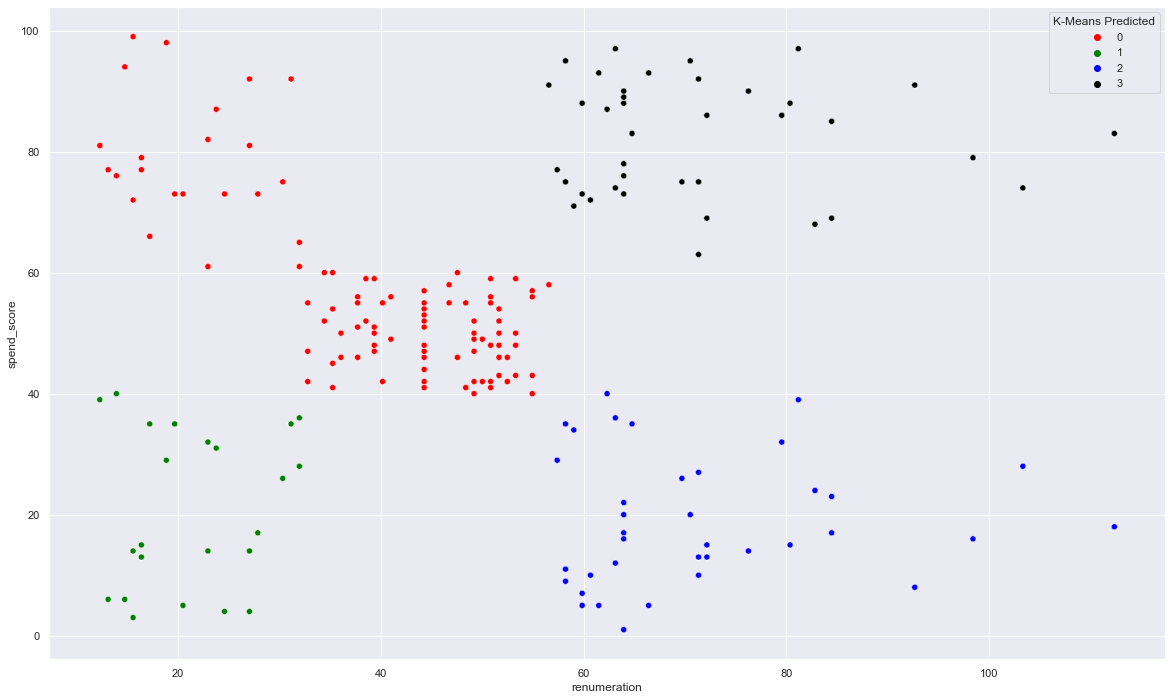

In [193]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(20, 12)})

sns.scatterplot(x='renumeration', 
                y ='spend_score',
                data=df_cluster_new.reset_index() , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

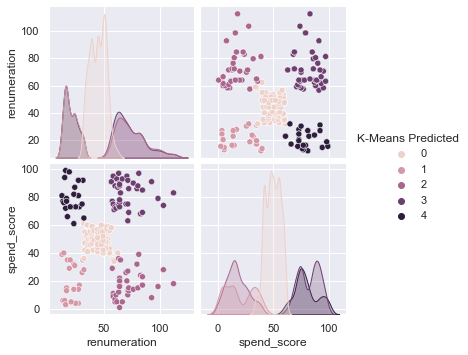

In [194]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df_cluster_new)
clusters = kmeans.labels_
df_cluster_new['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df_cluster_new, hue='K-Means Predicted', diag_kind= 'kde')

In [195]:
# Check the number of observations per predicted class.
df_cluster_new['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

<AxesSubplot:xlabel='renumeration', ylabel='spend_score'>

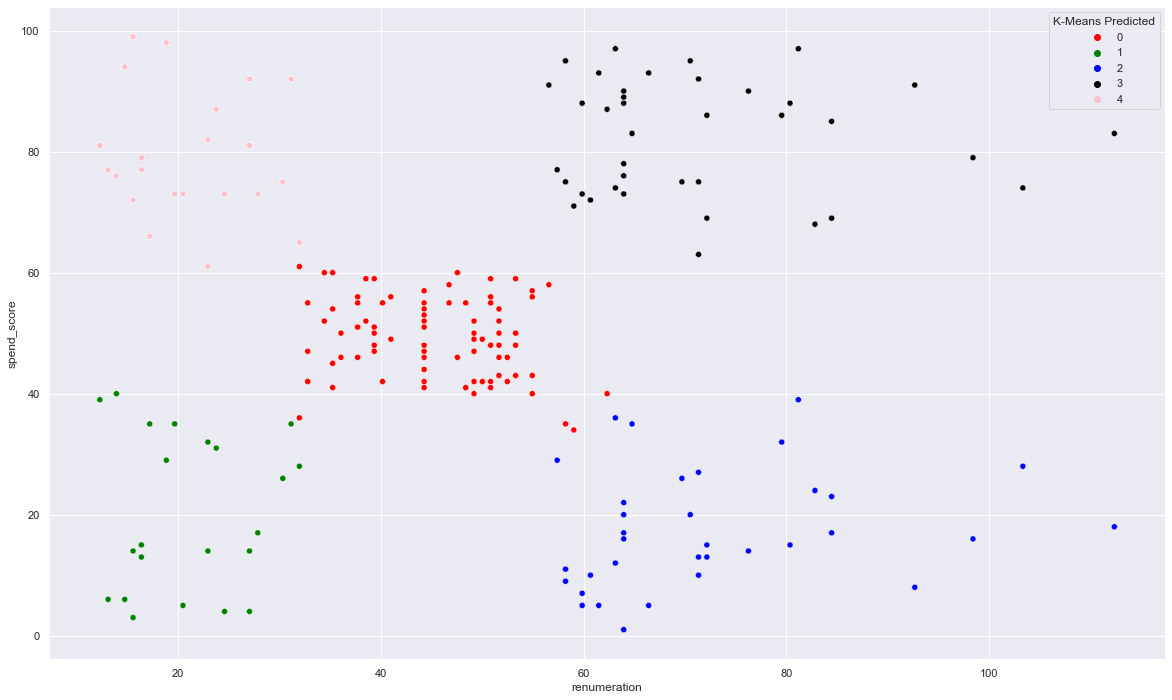

In [196]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(20, 12)})

sns.scatterplot(x='renumeration', 
                y ='spend_score',
                data=df_cluster_new, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'pink'])

## 7. Discuss: Insights and observations

***Your observations here...***

# it seems that k=5 (four clusters) might give the best results (groups) but k=4 would be acceptable too.
#However the cluster sizes change depenfding on the number of clusters.Having a separate cluster to highligh customers
#with high spend_Score and low renumeration is important to distinguish and may require different messaging

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [54]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [56]:
# Explore data set.
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [57]:
# Keep necessary columns. Drop unnecessary columns.
# Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'language', 'platform', 'product'], axis=1)

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [58]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [59]:
# Review: Change all to lower case and join with a space.
df3 ['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3 ['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [60]:
import pandas as pd
import string as string
#Replace punctuation
df3["review"] = df3["review"].str.replace("[^\w\s]","")
df3["summary"] = df3["summary"].str.replace("[^\w\s]","")

df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [61]:
# Drop duplicates in both columns.
df3.duplicated()
#Count number of duplicates
df3.duplicated().sum()
#Drop duplicates
df3.drop_duplicates()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [62]:
# Install NLTK library.
!pip install nltk

# Import the library.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elliot.fern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Assign the raw text data to a variable.
df4 =df3[['review', 'summary']]

#View dataframe
df4.reset_index(drop=True, inplace=True)
print(df4)

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4

In [64]:
#Apply tokenisation to both columns
df4['tokens_review'] = df4['review'].apply(word_tokenize)
df4['tokens_Summary'] = df4['summary'].apply(word_tokenize)

In [65]:
#View dataframe
df4.head()

,review,summary,tokens_review,tokens_Summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [66]:
#Create an empty string variable
all_comments = ' '
for i in range (df4.shape[0]):
                all_comments=all_comments+df4['review'][i]


# Review: Create a word cloud.
!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import seaborn as sns
# Assign the raw text data to a variable.


#View dataframe
df4.reset_index(drop=True, inplace=True)
#Set the color
sns.set(color_codes=True)
#Create a Wordcloud
text = df4['review']
wordcloud_review = WordCloud(width=1600, height=900,
                             background_color="white",
                             colormap="plasma",
                             stopwords= "none",
                             min_font_size=10)\
                             .generate(all_comments)



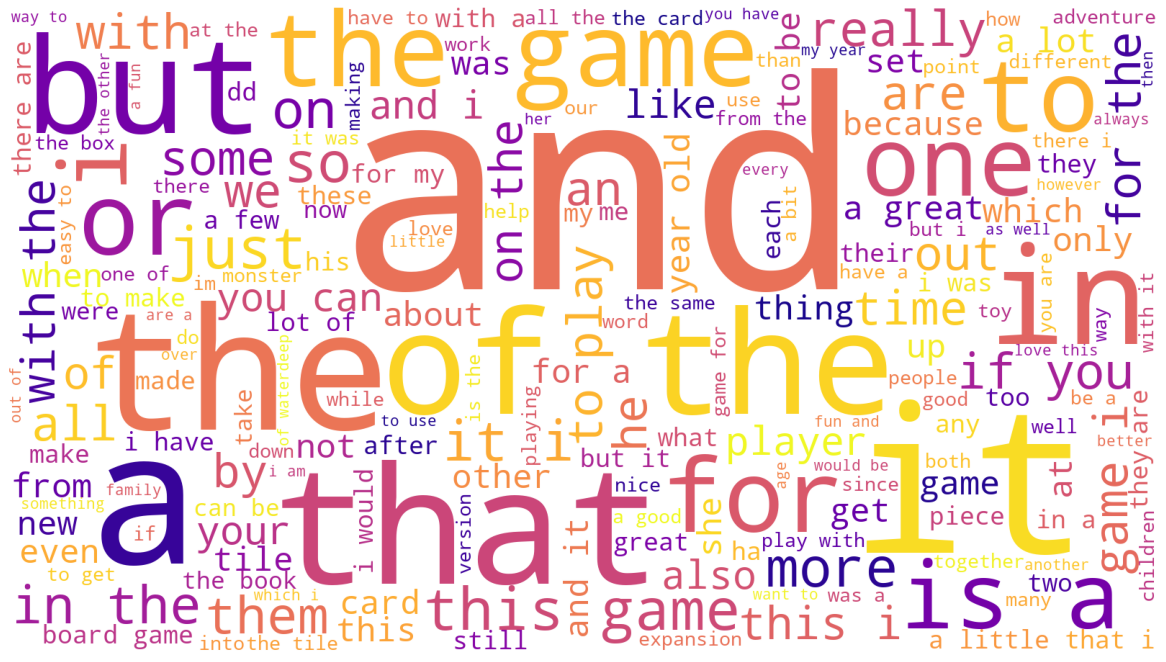

In [67]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16,9), facecolor = None)
plt.imshow(wordcloud_review)
plt.axis ('off')
plt.tight_layout(pad=0)
plt.show()

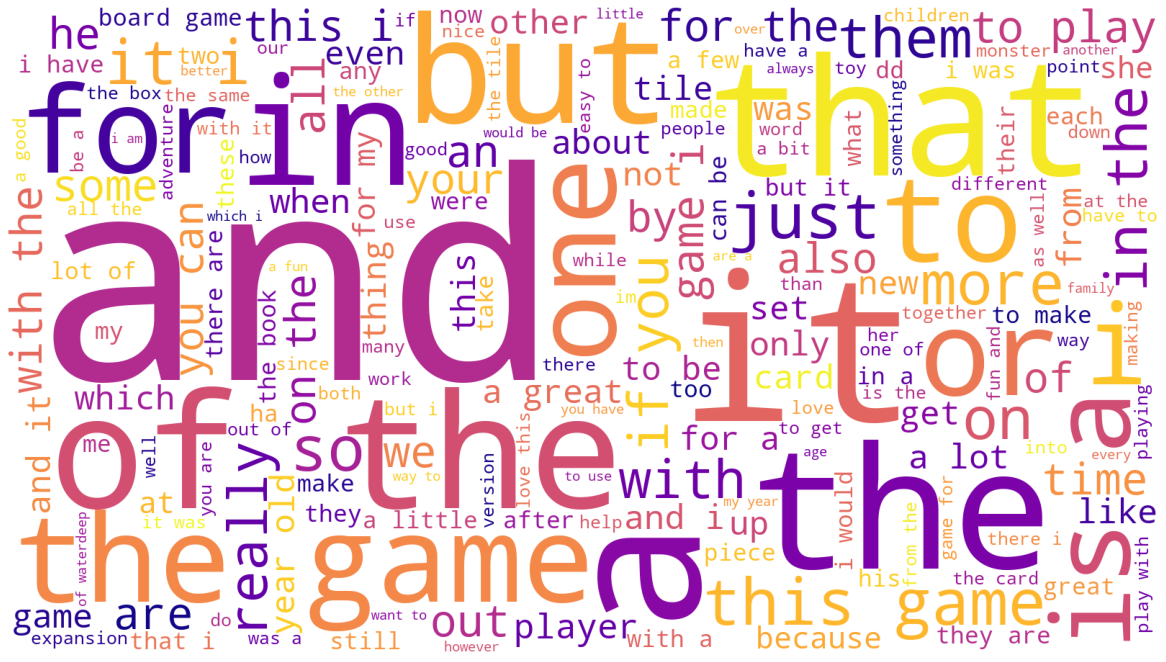

In [68]:
#Create an empty string variable
summary_comments = ' '
for i in range (df4.shape[0]):
                summary_comments=all_comments+df4['summary'][i]


# Review: Create a word cloud.
!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import seaborn as sns
# Assign the raw text data to a variable.


#View dataframe
df4.reset_index(drop=True, inplace=True)
#Set the color
sns.set(color_codes=True)
#Create a Wordcloud
text = df4['summary']
wordcloud_summary = WordCloud(width=1600, height=900,
                             background_color="white",
                             colormap="plasma",
                             stopwords= "none",
                             min_font_size=10)\
                             .generate(summary_comments)
# Review: Plot the WordCloud image.
plt.figure(figsize=(16,9), facecolor = None)
plt.imshow(wordcloud_summary)
plt.axis ('off')
plt.tight_layout(pad=0)
plt.show()

In [69]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df4['token_review']=df4['review'].apply(word_tokenize)

df4['token_review'].head()

df4['token_summary']=df4['summary'].apply(word_tokenize)

df4['token_summary'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elliot.fern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: token_summary, dtype: object

In [79]:
allreview_tokens=[]
for i in range(df4.shape[0]):
    allreview_tokens=allreview_tokens+df4['token_review'][i]
    
allsummary_tokens=[]
for i in range(df4.shape[0]):
    allsummary_tokens=allsummary_tokens+df4['token_summary'][i]

In [80]:
# Summary: Create a word cloud.
tokens1 =[word for word in allreview_tokens if word.isalnum()]

#Download stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords
#Create a set of english stopwords
english_stopwords=set(stopwords.words('english'))
#Create a filteres list of tokens without stopwords
tokens2=[x for x in tokens1 if x.lower() not in english_stopwords]

#Define an empty string variable
tokens2_string = ' '
for value in tokens2_string:
#Add each filtered word to string
    tokens2_string=tokens2_string + value + ' '
    
    print (tokens2_string)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elliot.fern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [81]:
# Determine the frequency distribution.
from nltk.probability import FreqDist

fdist=FreqDist(allreview_tokens)
fdist



FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [82]:
fdist=FreqDist(allsummary_tokens)
fdist


FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [83]:
# Delete all the alpanum.
tokens1 = [word for word in allreview_tokens if word.isalnum()]

In [84]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [76]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap = 'plasma',
stopwords = 'none',
min_font_size = 5).generate(tokens2_string)

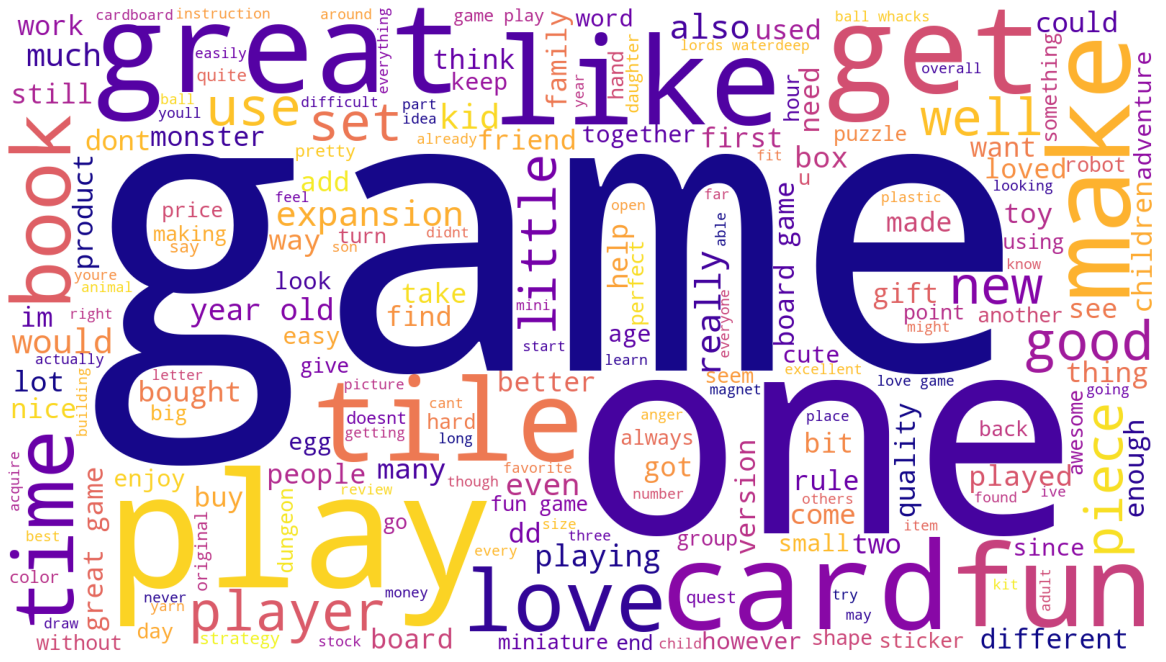

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [77]:
# Plot the wordcloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fdist1 = FreqDist(tokens2)
fdist

### 4d) Identify 15 most common words and polarity

AttributeError: 'Rectangle' object has no attribute 'get_Width'

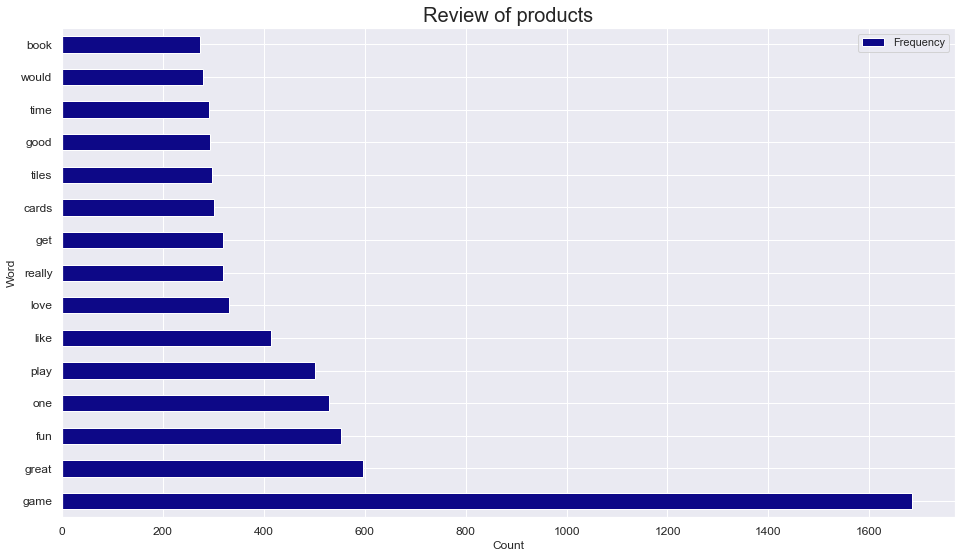

In [78]:
# Determine the 15 most common words.
'''top 15 commonly used words across the reviews.'''
#Generate DF out of Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns =['Word', 'Frequency']).set_index('Word')
                                                               
ax = counts.plot(kind='barh', figsize=(16,9), fontsize=12, colormap='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Review of products", fontsize=20)
for i in ax.patches:
    ax.text(i.get_Width()+.41, i.get_y()+.1, str(round((i.get_width()),
                                                      2)), fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# View output.
df4.head()

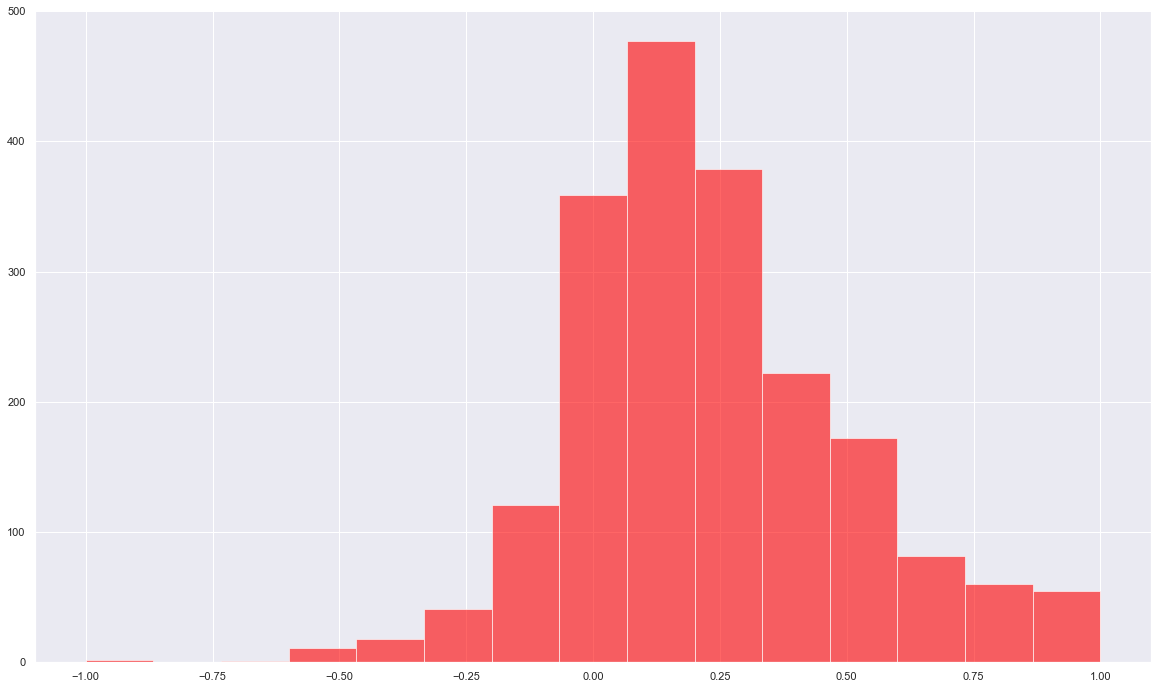

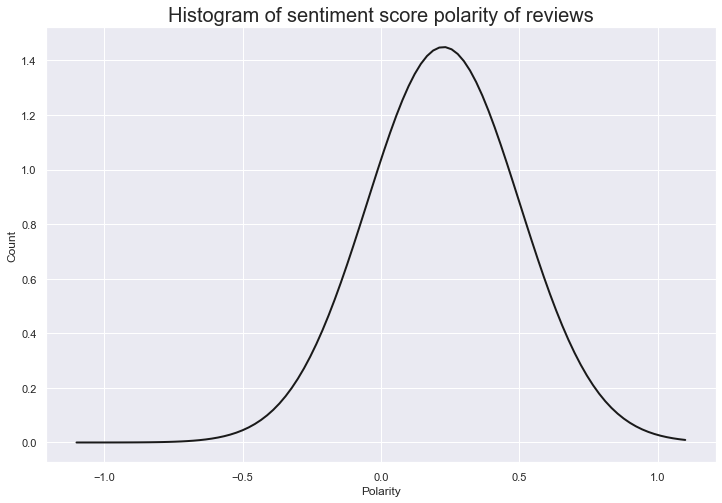

In [180]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_review'])
p=norm.pdf(x, mu, std)
plt.figure(figsize=(12,8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()

In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [181]:
# Top 20 negative reviews.
negative_sentiment_review = df4.nsmallest(20, 'polarity_review')
negative_sentiment_review_fin = negative_sentiment_review[['review', 'polarity_review']]
negative_sentiment_review_fin.style.set_properties(subset=['review'], **{'width':'1200px'})

# View output.
print(negative_sentiment_review_fin)

                                                 review  polarity_review
208   BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...        -1.000000
182                Incomplete kit!  Very disappointing!        -0.975000
989   If you, like me, used to play D&D, but now you...        -0.625000
1804  I'm sorry. I just find this product to be bori...        -0.583333
364   One of my staff will be using this game soon, ...        -0.550000
117   I bought this as a Christmas gift for my grand...        -0.500000
227   this was a gift for my daughter.  I found it d...        -0.500000
230                    I found the directions difficult        -0.500000
290              Instructions are complicated to follow        -0.500000
301                                           Difficult        -0.500000
803                               This game is a blast!        -0.500000
1524                        Expensive for what you get.        -0.500000
1829                           Scrabble in a card g

In [184]:
# Top 20 negative summaries.
negative_sentiment_summary = df4.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_fin = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width':'1200px'})

# View output.
print(negative_sentiment_summary_fin)

                                                summary  polarity_summary
21                       The worst value I've ever seen            -1.000
208   BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...            -1.000
829                                              Boring            -1.000
1166  before this I hated running any RPG campaign d...            -0.900
1     Another worthless Dungeon Master's screen from...            -0.800
144                                        Disappointed            -0.750
631                                       Disappointed.            -0.750
793                                        Disappointed            -0.750
1620                                       Disappointed            -0.750
363   Promotes anger instead of teaching calming met...            -0.700
885          Too bad, this is not what I was expecting.            -0.700
890                       Bad Quality-All made of paper            -0.700
178   At age 31 I found these very dif

In [186]:
# Top 20 positive reviews.
positive_sentiment_review = df4.nlargest(20, 'polarity_review')
positive_sentiment_review_fin = positive_sentiment_review[['review', 'polarity_review']]
positive_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})
# View output.
print(positive_sentiment_review_fin)

                                                review  polarity_review
7                           Came in perfect condition.              1.0
44     Absolutely great pictures even before coloring!              1.0
55                                              Great!              1.0
165                                       Awesome book              1.0
194                                       Awesome gift              1.0
216                   Great product!  Arrived on time.              1.0
318           Great buy!!  My granddaughter loves it!!              1.0
371                                             Great!              1.0
418  Great resource for BHIS care coordinators!! Wo...              1.0
474  Great Seller!!! Happy with my purchase!!! 5 st...              1.0
496  Excellent activity for teaching self-managemen...              1.0
503                       Great game...I use it a lot!              1.0
517                                Great therapy tool!          

In [187]:
# Top 20 positive reviews.
positive_sentiment_summary = df4.nlargest(20, 'polarity_summary')
positive_sentiment_summary_fin = positive_sentiment_summary[['summary', 'polarity_summary']]
positive_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})
# View output.
print(positive_sentiment_summary_fin)

                                               summary  polarity_summary
6                                  Best gm screen ever               1.0
28                                  Wonderful designs.               1.0
32                                            Perfect!               1.0
37          Great buy! Can't wait to work on this book               1.0
40                                       So beautiful!               1.0
57                                              great!               1.0
80   They're the perfect size to keep in the car or...               1.0
122                                  Great for a gift!               1.0
134                            Perfect for Preschooler               1.0
140             Awesome sticker activity for the price               1.0
161                                    Awesome Book...               1.0
163                    He was very happy with his gift               1.0
187                                            Awes

# 